### This is a notebook covering a basic exploratory data analysis process<br/><br/>The analysis is certainly not exhaustive and is intended to demonstrate the importance of this often overlooked stage of the analysis process.
#### This dataset limited my ability to demonstrate certain aspects of EDA, especially due to the limited availability of categorical variables

## 1. Import libraries and dataset

In [193]:
# data manipulation
import pandas as pd
import numpy as np

# Custom EDA report
from dataprep.eda import create_report   # Used to load Report format

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# image import
from IPython.display import Image

# use sklearn to import a dataset
from sklearn.datasets import load_wine

In [194]:
# format data into dataframe
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
# creiamo la colonna per il target
df["target"] = data.target

## 2. Understanding the big picture

##### Get a view of how many rows and columns we're working with

In [195]:
df.shape

(178, 14)

##### Have a look at the distribution of the numeric variables. No need to go into detail yet, but something interesting may stand out - particularly if we already have domain knowledge

In [196]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

##### Understand the nulls that may be present in the dataset and what the data types are

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

##### At this stage of the process I use this report tool from the dataprep library. It gives a comprehensive view of the dataset. Some information may be repeated from previous steps and some information may be too ealry for this stage of the process, but it adds significant value in understanding the dataset

  0%|          | 0/2733 [00:00<?, ?it/s]

c:\Users\Regan-John Daniels\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


DataPrep Report
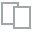
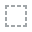
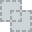
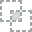
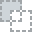
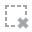
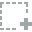
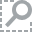
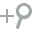
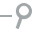
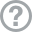
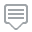
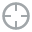
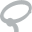
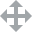
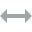
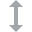
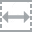
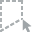
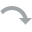
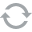
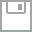
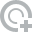
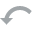
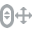
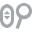
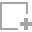
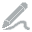
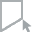
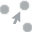
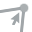
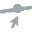

In [198]:
create_report(df)

## 3. Data Preparation

##### I print out the column names for easy reference in this stage of the process

In [199]:
df.columns.to_list()

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'target']

##### Check if there are any duplicate rows or null values in the data... Fortunately this is a very clean dataset!!

In [200]:
df.duplicated().sum()

0

In [201]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

#### At this point I consider renaming, adding or removing columns

#### The 'od280/od315_of_diluted_wines' column name didn't quite make sense, so some Google-ing revealed a more appropriate name 

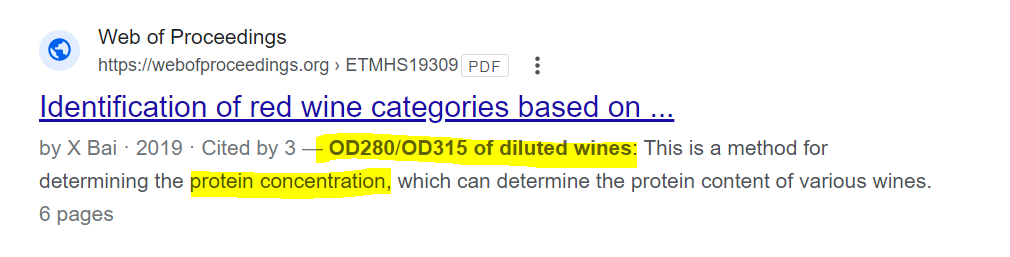

In [202]:

Image("G:\\My Drive\\Regan-John Daniels System\\Career\\Improve Professional Profile\\Project 1 EDA\\protein_concentration.png")

In [203]:
# rename column
df.rename(columns={"od280/od315_of_diluted_wines": "protein_concentration"}, inplace=True)

#### I have no reason to remove any columns at this stage - as far as I know all the variables may contain relevant information. If I had significantly more domain knowledge in this field, I may be able to exclude certain variables at this stage

#### This is also the stage at which feature engineering might be performed. Transforming, exatracting, selecting and iterating data can be a lengthy process. The quality of this step is highly dependent on the domain knowledge of the analyst. I would certainly have to do some real-world research on wines in order to successfully perform this step on this dataset

## 4. Understanding the variables

#### I previously looked at the dataset in its entirety - now I'll have a look at individual variables

## Univariate analysis

### Categorical

#### This dataset consists primarily of numeric variables. Only the target can be considered a categorical variable. Variables such as gender or age bracket constitute categorical variables which I would generally explore here

#### We can see that the type 2 wine appears slightly less than the other two types of wine. This shows us how balanced the wine types are within the dataset<br/>If we perform modelling on this dataset, we should consider whether we need to use data balancing techniques to not confuse the model

In [204]:
# View the number of occurences as aboslute values and as proportions

print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))

1    71
0    59
2    48
Name: target, dtype: int64
1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64


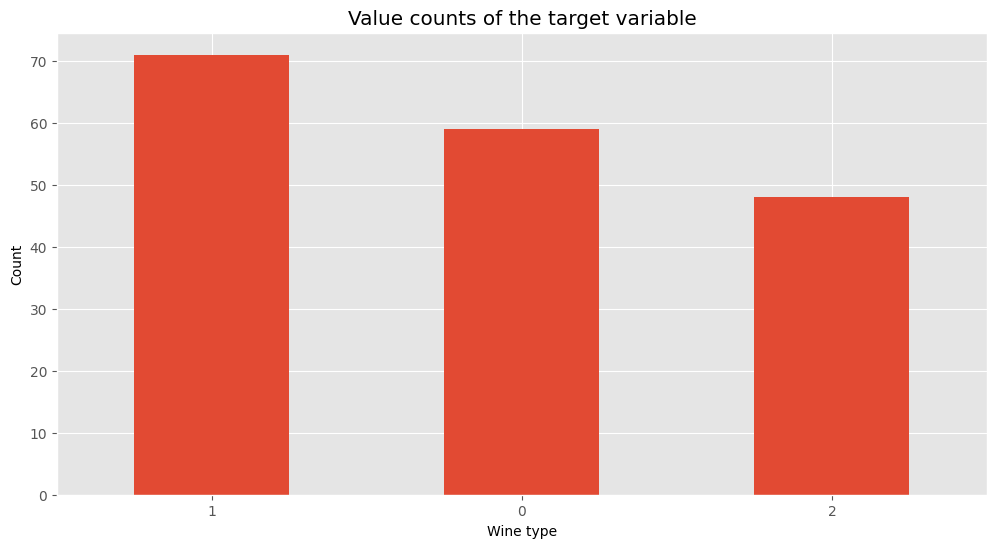

In [205]:
# Visual representation of the categorical variable count

df['target'].value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Wine type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

### Numeric

#### Here I have a look at the distribution of the numeric variables - this can also be viewed using the report generated in the second stage of the analysis

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64
Skewness: 1.098191054755161
Kurtosis: 2.1049913235905557


<Axes: >

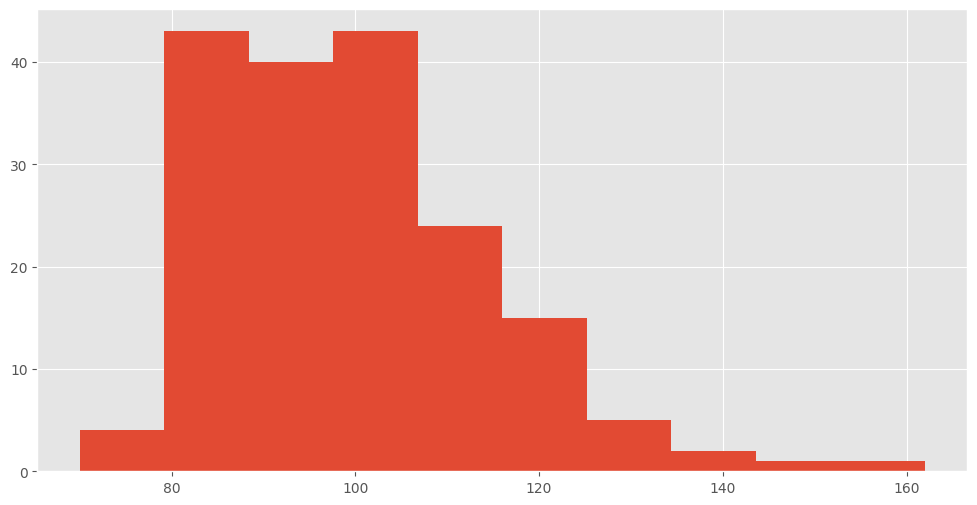

In [206]:
print(df['magnesium'].describe())
print(f"Skewness: {df['magnesium'].skew()}")
print(f"Kurtosis: {df['magnesium'].kurt()}")
df['magnesium'].hist()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64
Skewness: -0.051482331077134784
Kurtosis: -0.8524995684849164


<Axes: >

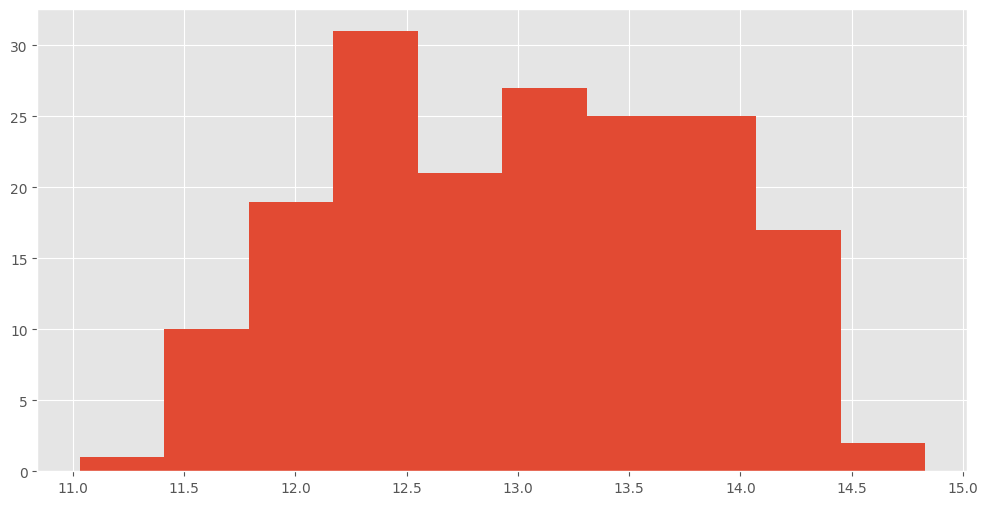

In [207]:
print(df['alcohol'].describe())
print(f"Skewness: {df['alcohol'].skew()}")
print(f"Kurtosis: {df['alcohol'].kurt()}")
df['alcohol'].hist()

count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: malic_acid, dtype: float64
Skewness: 1.0396511925814442
Kurtosis: 0.2992066798717512


<Axes: >

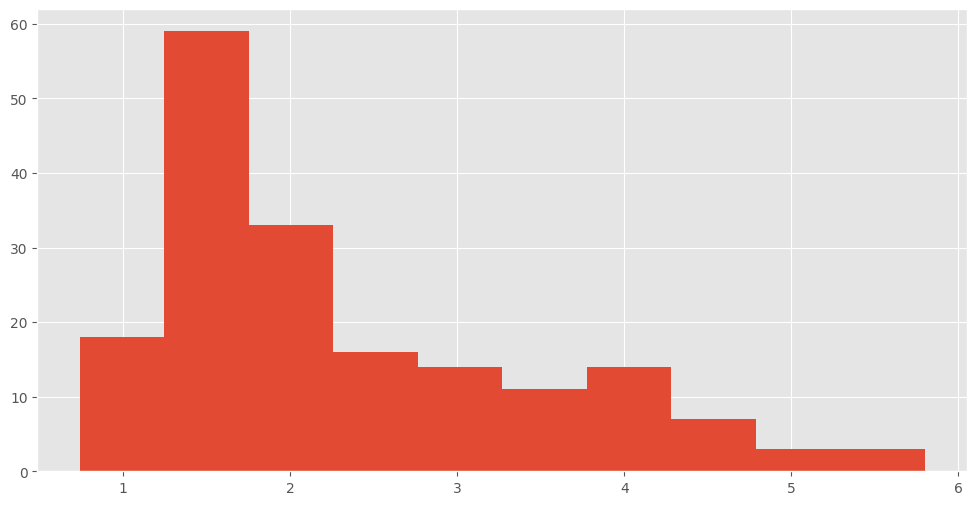

In [161]:
print(df['malic_acid'].describe())
print(f"Skewness: {df['malic_acid'].skew()}")
print(f"Kurtosis: {df['malic_acid'].kurt()}")
df['malic_acid'].hist()

count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: ash, dtype: float64
Skewness: -0.17669931645735712
Kurtosis: 1.1439781688330677


<Axes: >

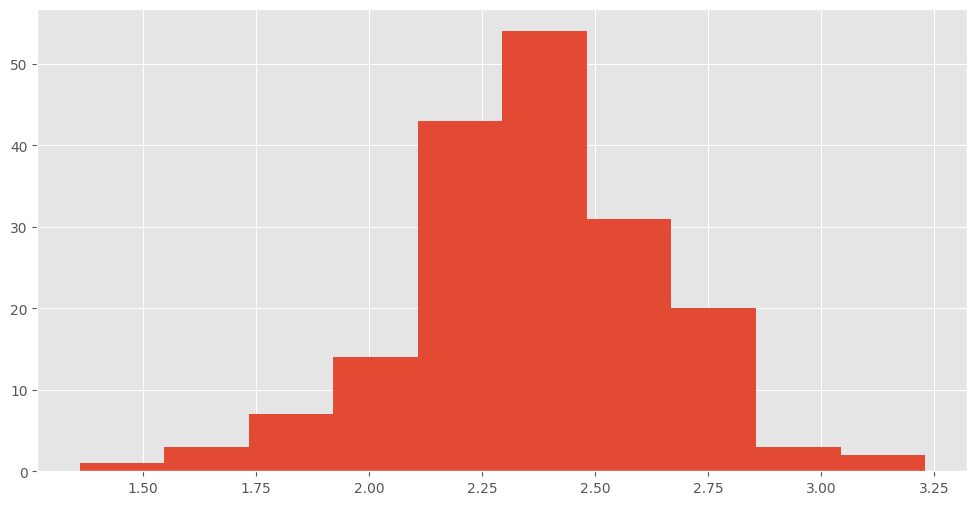

In [162]:
print(df['ash'].describe())
print(f"Skewness: {df['ash'].skew()}")
print(f"Kurtosis: {df['ash'].kurt()}")
df['ash'].hist()

count    178.000000
mean      19.494944
std        3.339564
min       10.600000
25%       17.200000
50%       19.500000
75%       21.500000
max       30.000000
Name: alcalinity_of_ash, dtype: float64
Skewness: 0.21304688642645586
Kurtosis: 0.4879415404679124


<Axes: >

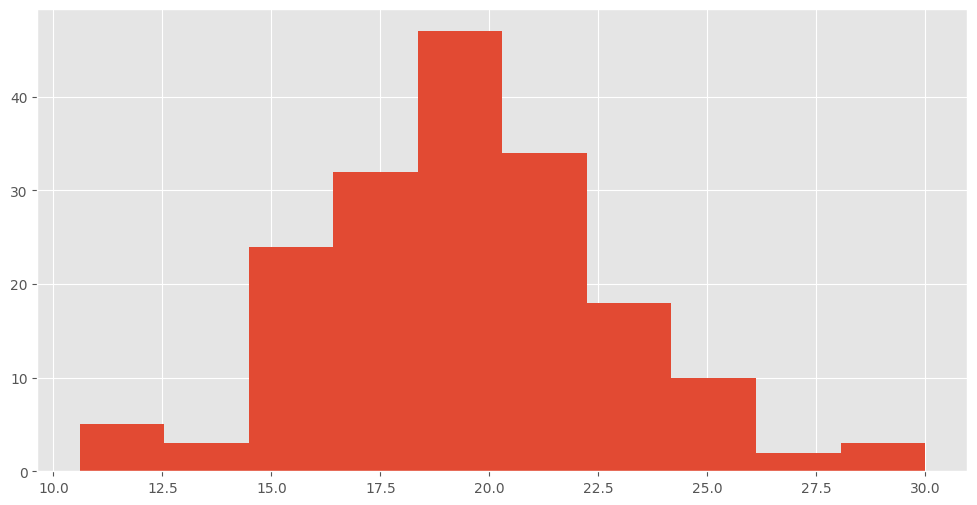

In [163]:
print(df['alcalinity_of_ash'].describe())
print(f"Skewness: {df['alcalinity_of_ash'].skew()}")
print(f"Kurtosis: {df['alcalinity_of_ash'].kurt()}")
df['alcalinity_of_ash'].hist()

count    178.000000
mean       2.295112
std        0.625851
min        0.980000
25%        1.742500
50%        2.355000
75%        2.800000
max        3.880000
Name: total_phenols, dtype: float64
Skewness: 0.08663858640245253
Kurtosis: -0.8356265233980293


<Axes: >

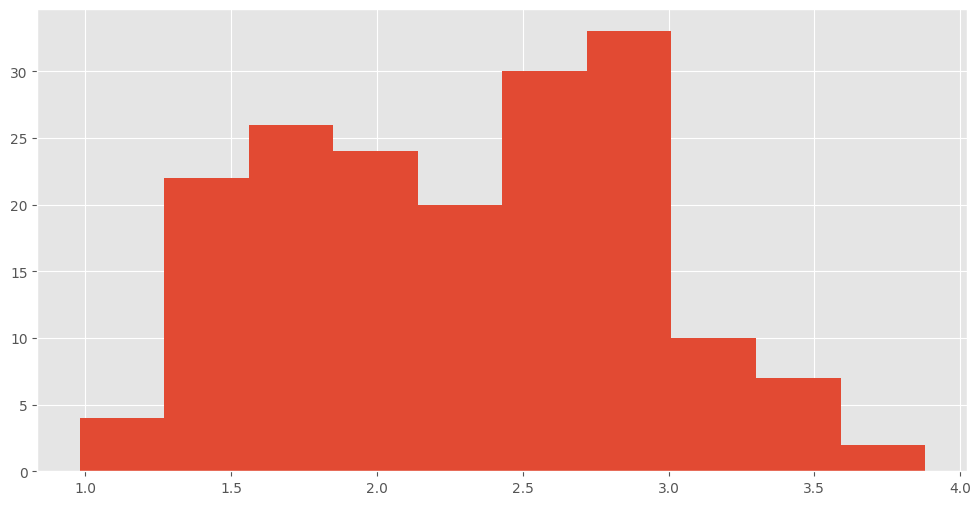

In [164]:
print(df['total_phenols'].describe())
print(f"Skewness: {df['total_phenols'].skew()}")
print(f"Kurtosis: {df['total_phenols'].kurt()}")
df['total_phenols'].hist()

count    178.000000
mean       0.361854
std        0.124453
min        0.130000
25%        0.270000
50%        0.340000
75%        0.437500
max        0.660000
Name: nonflavanoid_phenols, dtype: float64
Skewness: 0.4501513355621236
Kurtosis: -0.6371910641424079


<Axes: >

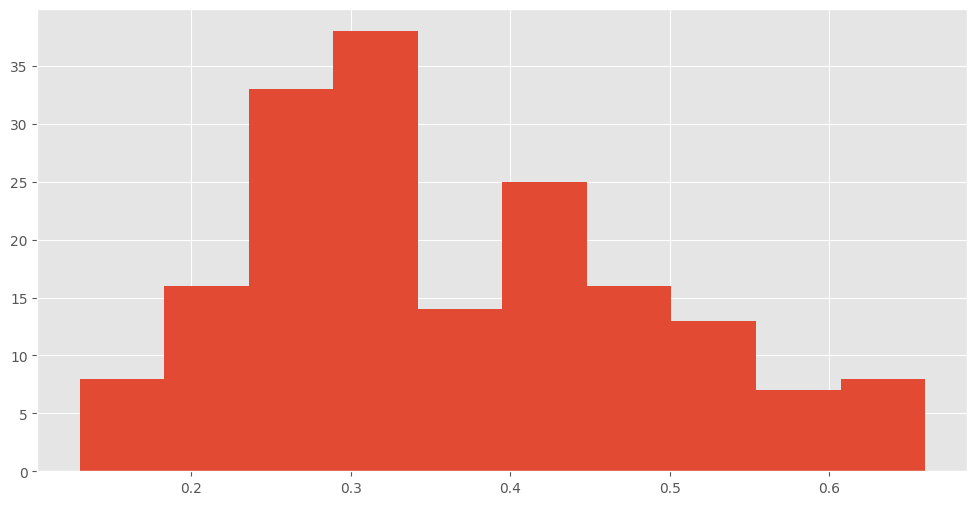

In [165]:
print(df['nonflavanoid_phenols'].describe())
print(f"Skewness: {df['nonflavanoid_phenols'].skew()}")
print(f"Kurtosis: {df['nonflavanoid_phenols'].kurt()}")
df['nonflavanoid_phenols'].hist()

count    178.000000
mean       2.029270
std        0.998859
min        0.340000
25%        1.205000
50%        2.135000
75%        2.875000
max        5.080000
Name: flavanoids, dtype: float64
Skewness: 0.02534355338149103
Kurtosis: -0.8803815472453591


<Axes: >

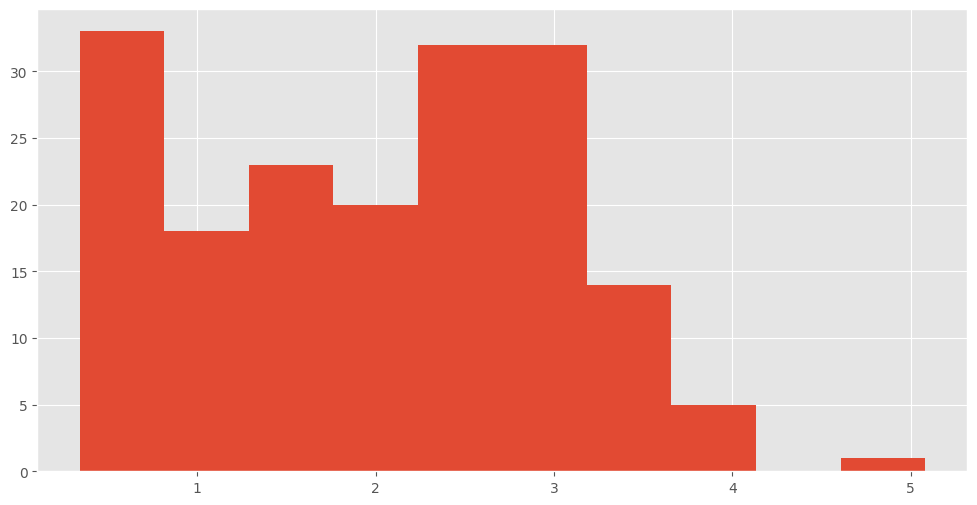

In [166]:
print(df['flavanoids'].describe())
print(f"Skewness: {df['flavanoids'].skew()}")
print(f"Kurtosis: {df['flavanoids'].kurt()}")
df['flavanoids'].hist()

count    178.000000
mean       1.590899
std        0.572359
min        0.410000
25%        1.250000
50%        1.555000
75%        1.950000
max        3.580000
Name: proanthocyanins, dtype: float64
Skewness: 0.5171371722998975
Kurtosis: 0.5546485226011098


<Axes: >

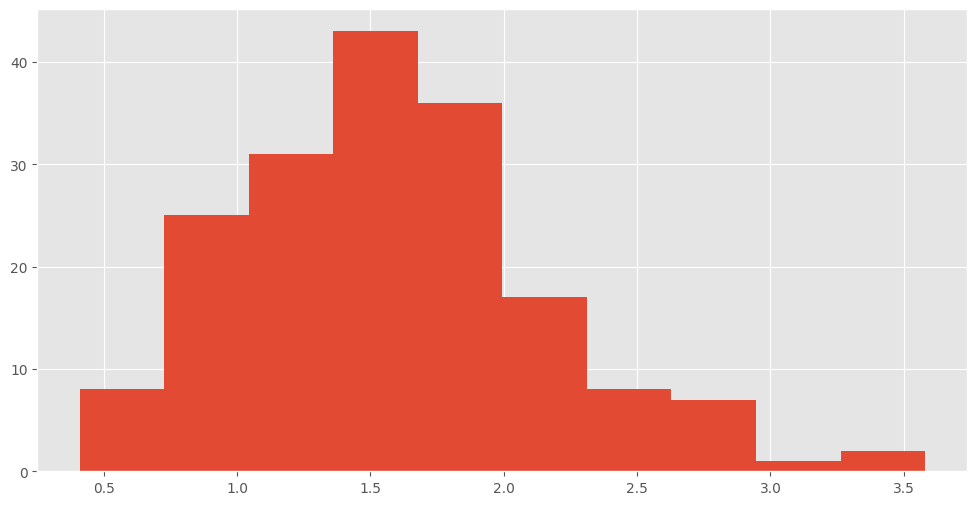

In [167]:
print(df['proanthocyanins'].describe())
print(f"Skewness: {df['proanthocyanins'].skew()}")
print(f"Kurtosis: {df['proanthocyanins'].kurt()}")
df['proanthocyanins'].hist()

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: color_intensity, dtype: float64
Skewness: 0.8685847909572548
Kurtosis: 0.38152227277478135


<Axes: >

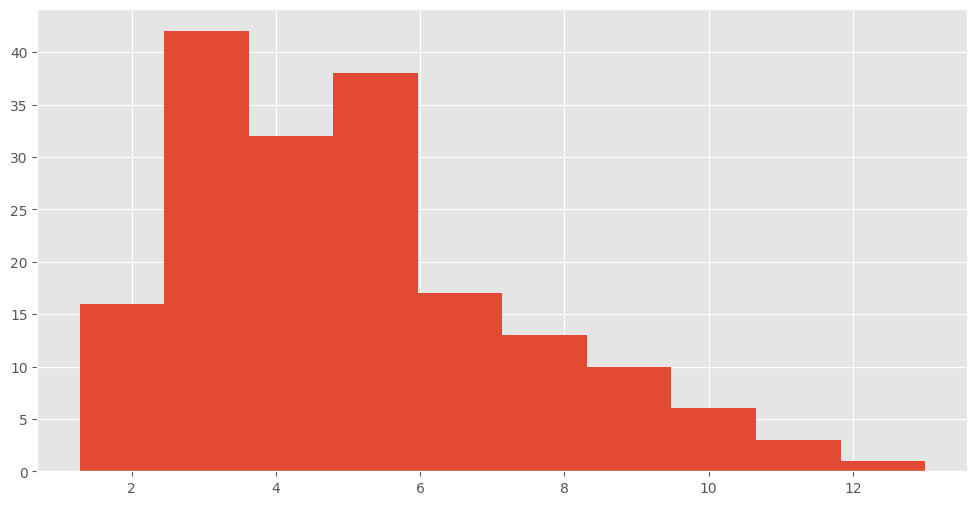

In [168]:
print(df['color_intensity'].describe())
print(f"Skewness: {df['color_intensity'].skew()}")
print(f"Kurtosis: {df['color_intensity'].kurt()}")
df['color_intensity'].hist()

count    178.000000
mean       0.957449
std        0.228572
min        0.480000
25%        0.782500
50%        0.965000
75%        1.120000
max        1.710000
Name: hue, dtype: float64
Skewness: 0.021091272199709302
Kurtosis: -0.3440957413614769


<Axes: >

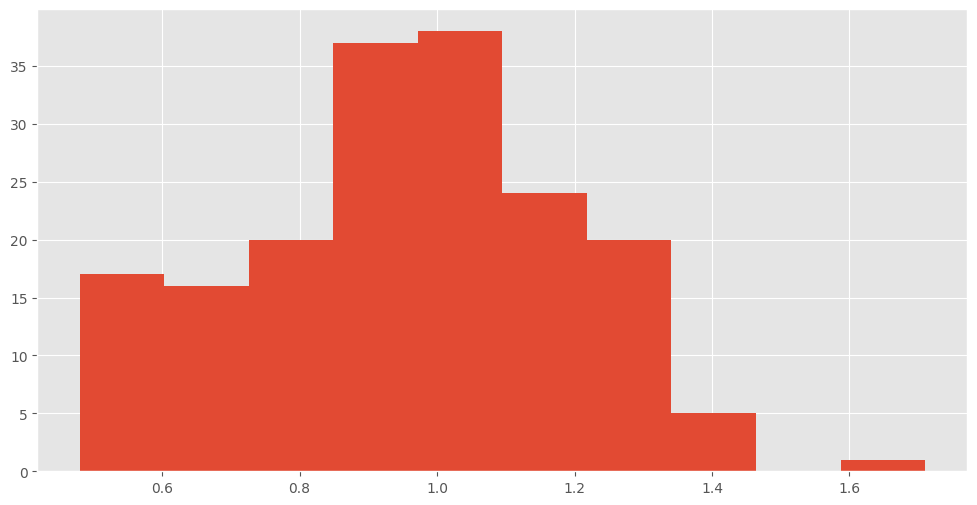

In [169]:
print(df['hue'].describe())
print(f"Skewness: {df['hue'].skew()}")
print(f"Kurtosis: {df['hue'].kurt()}")
df['hue'].hist()

count    178.000000
mean       2.611685
std        0.709990
min        1.270000
25%        1.937500
50%        2.780000
75%        3.170000
max        4.000000
Name: protein_concentration, dtype: float64
Skewness: -0.30728549895848106
Kurtosis: -1.0864345274098695


<Axes: >

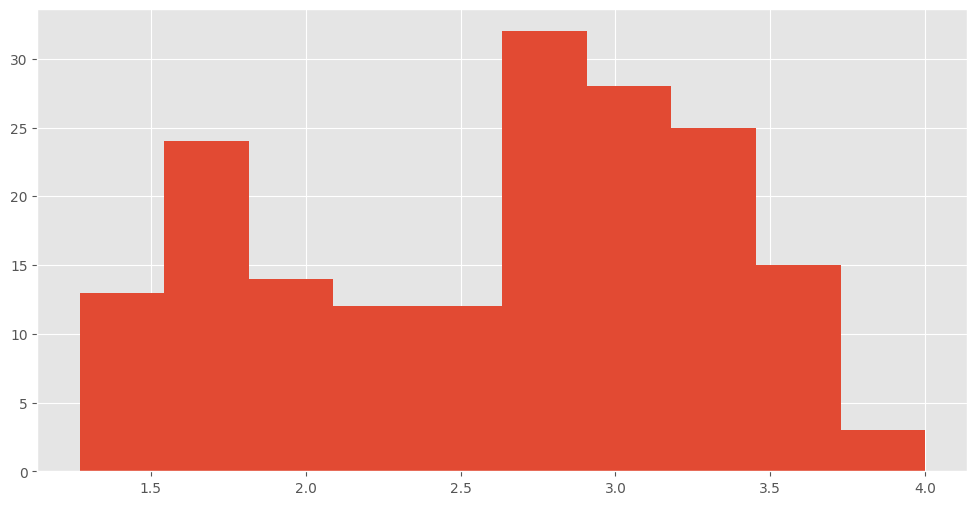

In [208]:
print(df['protein_concentration'].describe())
print(f"Skewness: {df['protein_concentration'].skew()}")
print(f"Kurtosis: {df['protein_concentration'].kurt()}")
df['protein_concentration'].hist()

count     178.000000
mean      746.893258
std       314.907474
min       278.000000
25%       500.500000
50%       673.500000
75%       985.000000
max      1680.000000
Name: proline, dtype: float64
Skewness: 0.7678217813897322
Kurtosis: -0.24840310614613248


<Axes: >

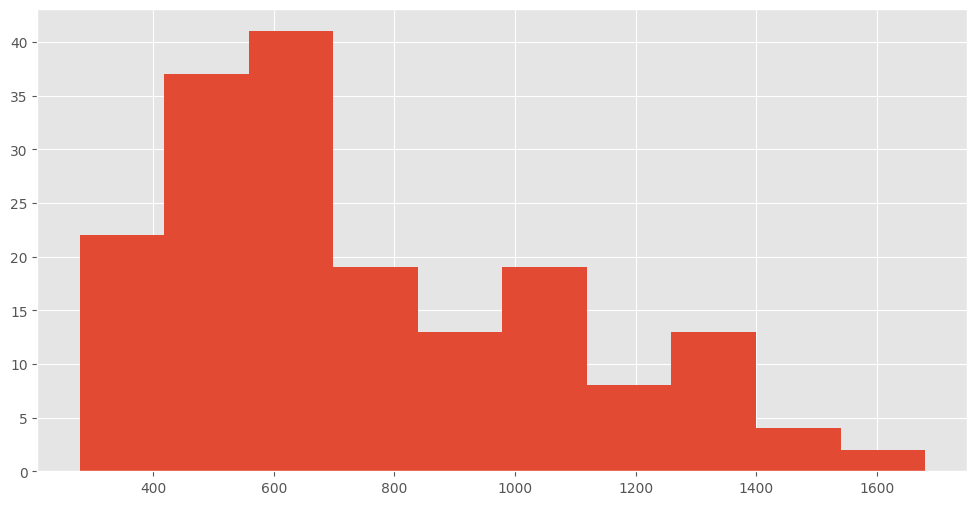

In [171]:
print(df['proline'].describe())
print(f"Skewness: {df['proline'].skew()}")
print(f"Kurtosis: {df['proline'].kurt()}")
df['proline'].hist()

## 4. Study of relationship between variables

#### Now I try to identify interesting relationships to show the influence of one variable on the other, preferably on the target. This unlocks the first intelligence options - in a business context this offers value and the ability to act strategically

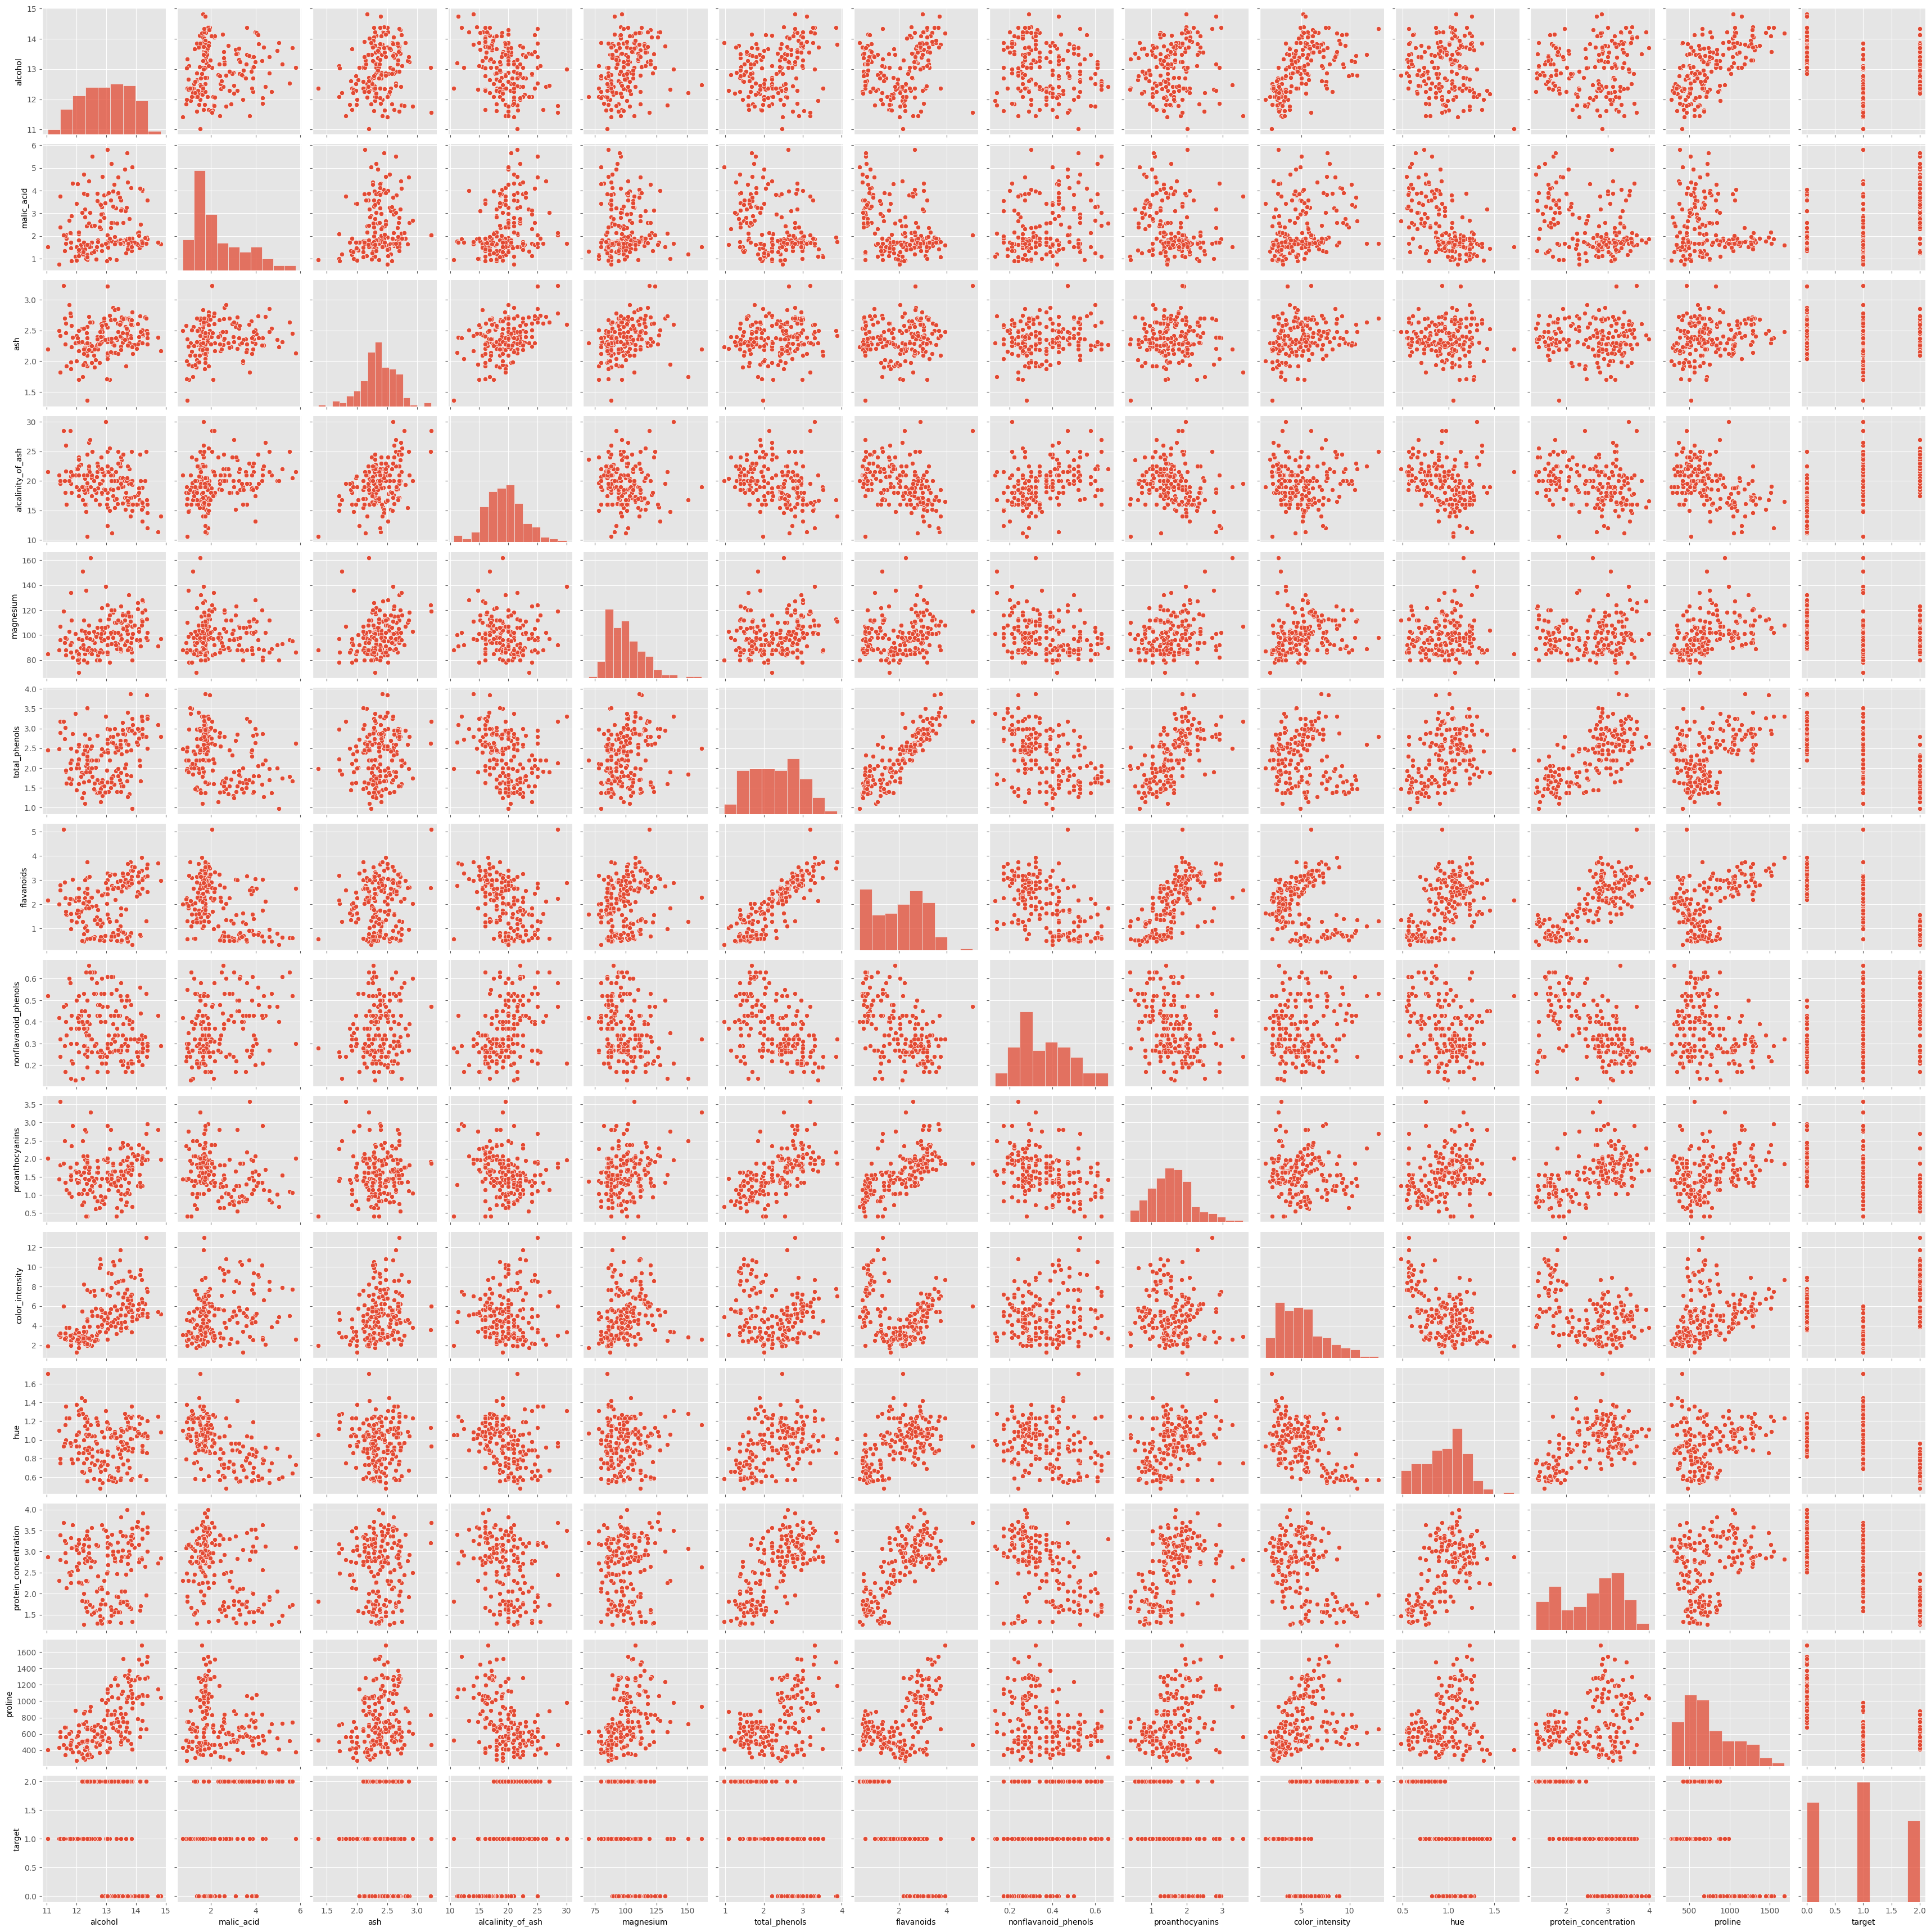

In [209]:
sns.pairplot(df)

#### A strong relationship between flavanoids and total_phenols immediately jumps out at you. A few weaker relationships exist, but this seems to be the strongest relationship which may warrant further understanding

#### To understand relationship between numeric and categorical variables, I'll use boxplots

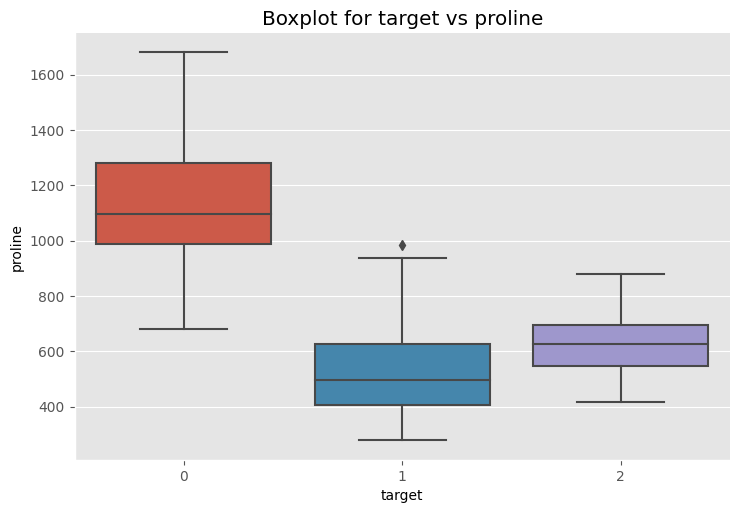

In [211]:
sns.catplot(x="target", y="proline", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs proline")
plt.show()

#### Box 0 significantly higher than 1 and 2 indicating a difference between the groups<br/>Bodies are fairly similar, although 1 has a much larger range than 1 and 2
***

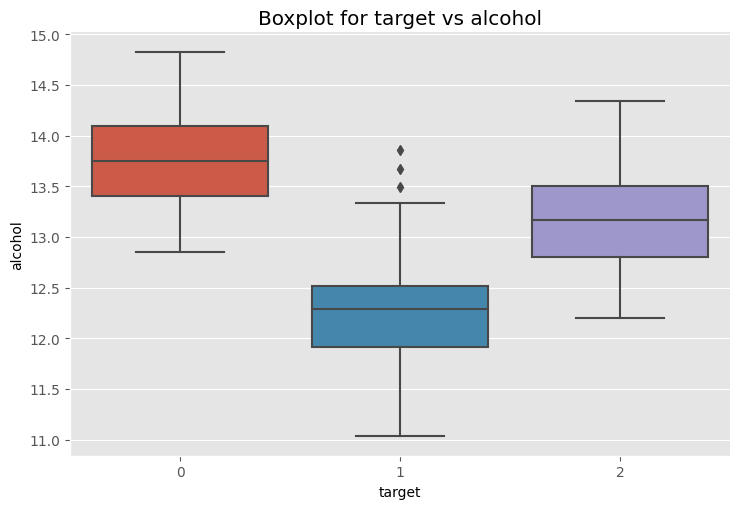

In [114]:
sns.catplot(x="target", y="alcohol", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs alcohol")
plt.show()

#### Similar separation of type 0 from 1 and 2, however, not as extreme as proline<br/>Different boxes take on similar shapes, mainly separated by the level
***

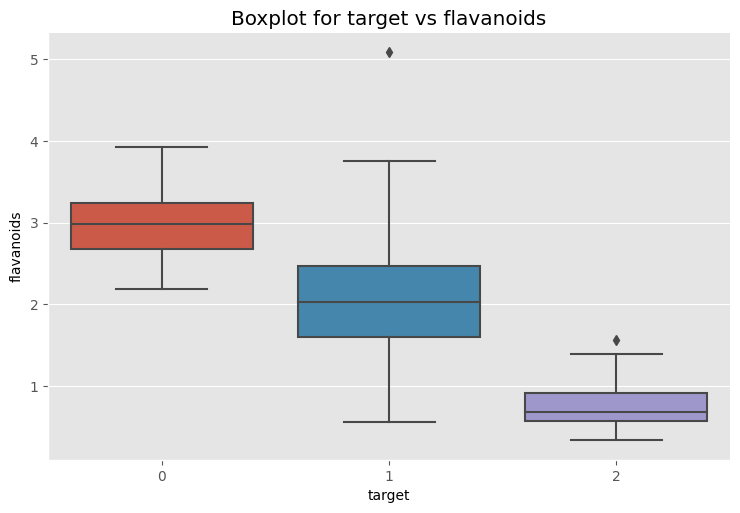

In [115]:
sns.catplot(x="target", y="flavanoids", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs flavanoids")
plt.show()

#### Clear distinction between the types<br/>More overlap between type 0 and 1, with 0 having generally higher flavanoids<br/>Type 2 flavanoid levels not as varied as 0 and 1, and definitely has a generally lower flavanoid count compared to 0 and 1
***

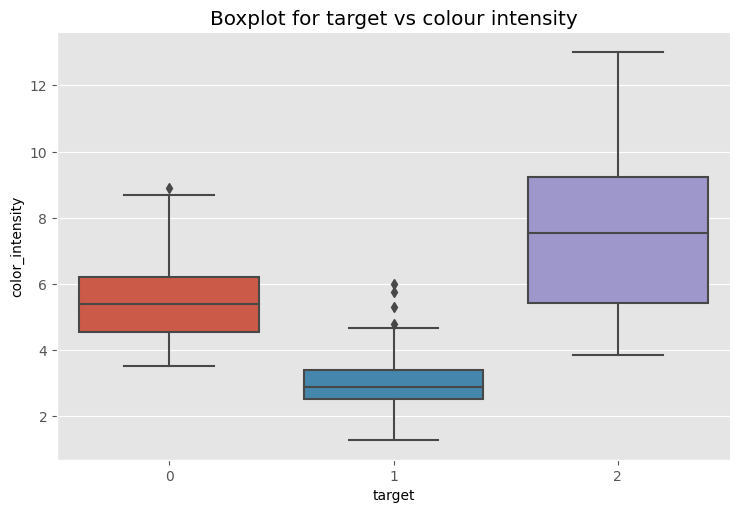

In [116]:
sns.catplot(x="target", y="color_intensity", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs colour intensity")
plt.show()

#### Significant variation in the shapes of the box plots across all groups<br/>Type 2 spans a larger variety of color intensity being generally higher and more extreme to the upside than types 0 and 1<br/>Type 1 has less variance in color intensity and generally has a lower colour intensity
***

#### The 4 variables above were used as they show a slightly more marked segmentation of the types. Below is a box plot for ash and the target variable where we can see there is less variation between the different wine types than the above variables

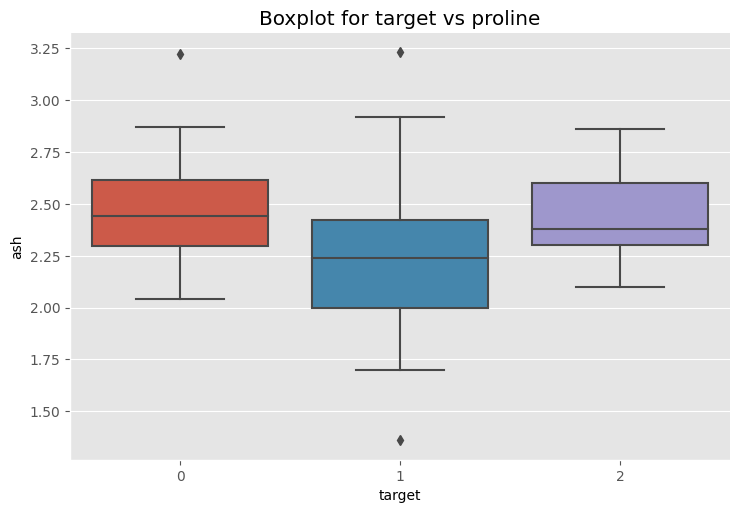

In [112]:
sns.catplot(x="target", y="ash", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs proline")
plt.show()

#### Medians are very close together and upper whiskers have almost equal values<br/>The box shapes are very similar<br/>There is more similarity in this ash data than in the variables explored above, which is why I'm focusing on them as an example
***

#### The box plots above provided insight into the distinction between the different wine types based on certain variables.<br/><br/>Type 0 seemed to have larger values for alcohol, flavanoids and proline<br/>Perhaps a distinguishing feature of type 0 wines could be higher values for these variables<br/><br/>I'm going to use a scatterplot to see the relationship between these variables by wine type

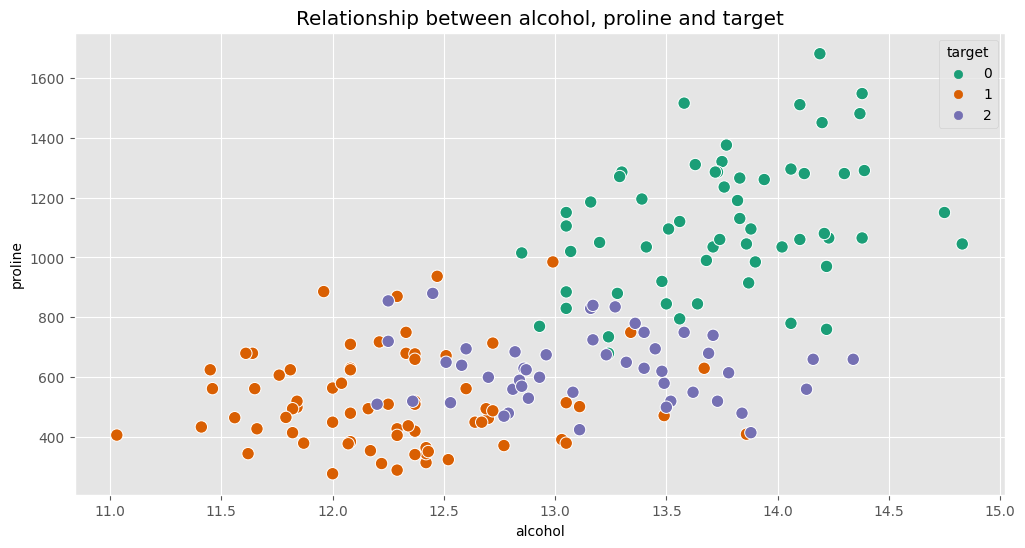

In [190]:
sns.scatterplot(x="alcohol", y="proline", hue="target", data=df, palette="Dark2", s=80)
plt.title("Relationship between alcohol, proline and target")
plt.show()

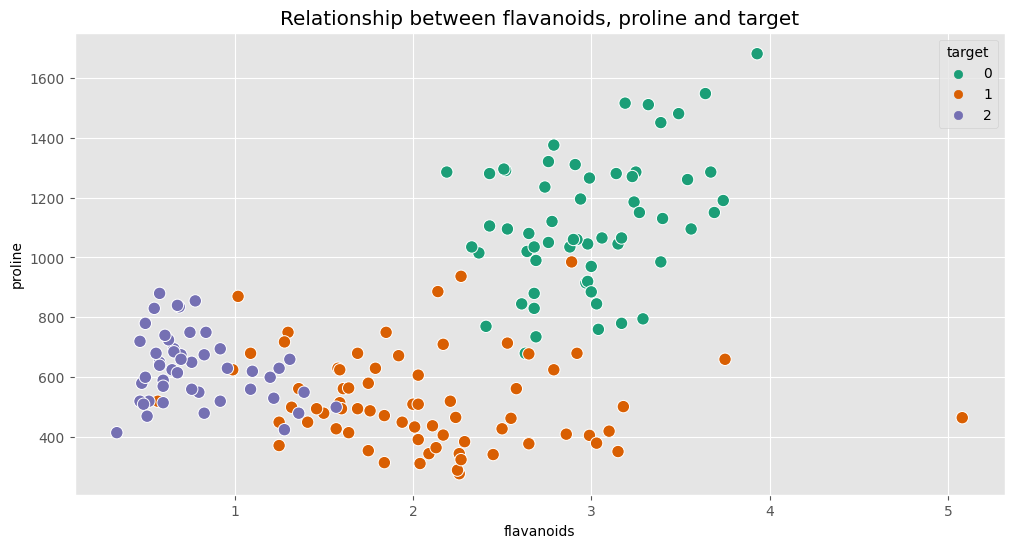

In [191]:
sns.scatterplot(x="flavanoids", y="proline", hue="target", data=df, palette="Dark2", s=80)
plt.title("Relationship between flavanoids, proline and target")
plt.show()

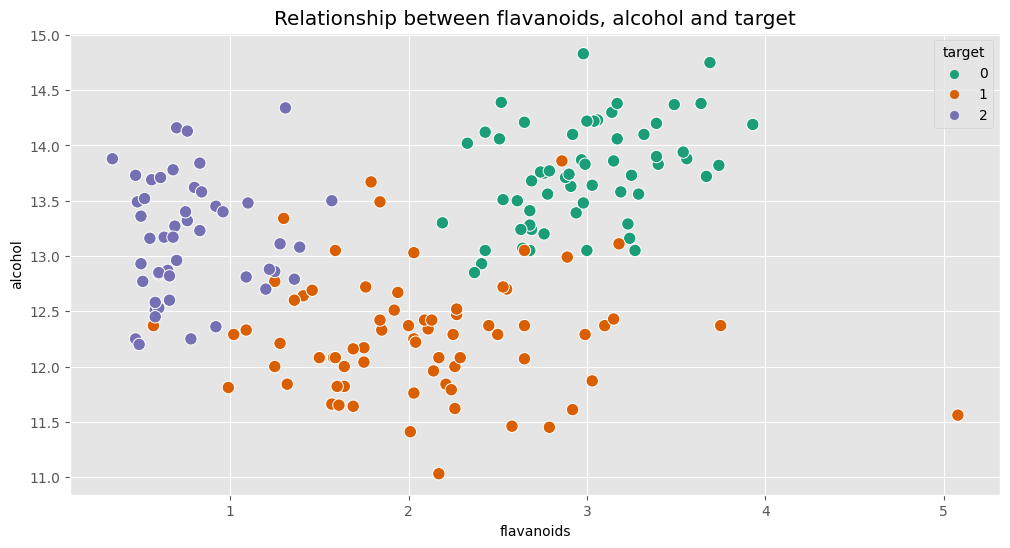

In [192]:
sns.scatterplot(x="flavanoids", y="alcohol", hue="target", data=df, palette="Dark2", s=80)
plt.title("Relationship between flavanoids, alcohol and target")
plt.show()

#### These scatterplots certainly unveil some patterns:<br/>
> Alcohol and proline provide the weakest groupings, but a clear relationship between levels of alcohol and proline, and wine type can be seen: Type 1 has lower proline and lower alcohol combination, type 2 has lower proline and varying alcohol combination and type 0 has a significantly higher proline and alcohol combination than the other two types

> The plot for flavanoids and proline shows proline levels are much higher while for type 0 and flavanoids being much higher than type 1 and mostly higher than type 2

> The plot for flavanoids and alcohol also shows a distinctinve type 0 occupying an area of the chart with a higher flavanoid and alcohol cobination, although the alcohol levels are not significantly higher than the other types

### A heat map will expose correlations more effectively

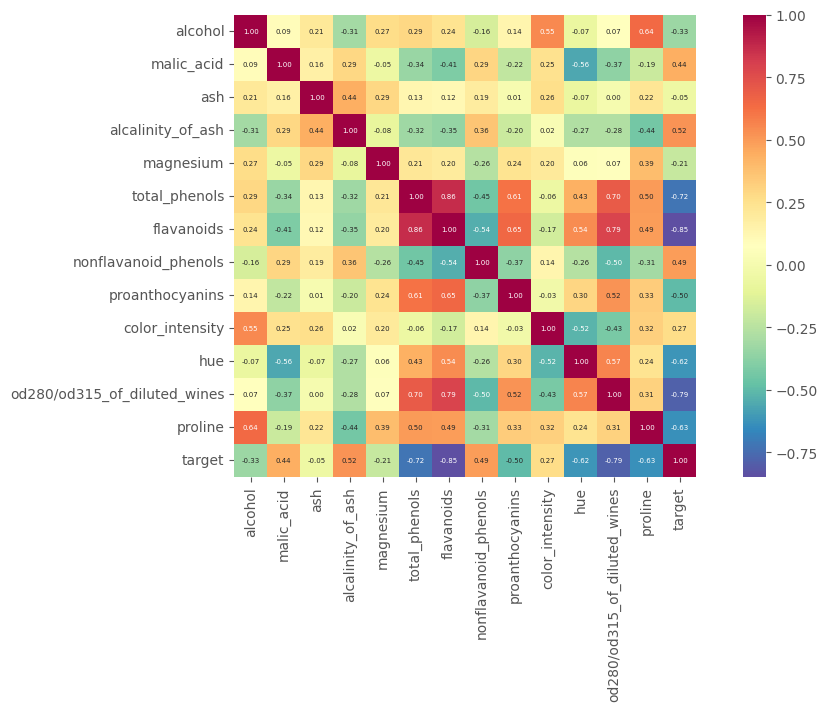

In [132]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 5}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

#### We can see that flavanoids and proline increase significantly as the wine type decreases (negative correlation). This is confirmation for our observations in the scatterplot charts and provides a quantifiable relationship to explore further.<br/>It also exposes similar relationships of the target variable with total_phenols and protein_concentration - we can now explore this further

## 5. Brainstorming

#### The small portion of data we have explored will start making us think about what differentiates type 0 wines from 1 and 2 - it seems to have a different chemical composition.<br/>We have more information with which to pose other hypotheses and try to differentiate type 1 and 2 wines from eachother.<br/><br/>I will often have a notebook with me during the exploration process to record any interesting ideas that I can go back to explore. These ideas will build the foundation of the output of the exploratory process which will inform any further analysis performed<br/><br/>Understanding the variables better at this point may prompt an exercise in feature engineering based on the knowledge gained up to this point